In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\johnn\\OneDrive\\Desktop\\ML_DATASETS\\CLASSIFICATION\\iris\\iris.data")

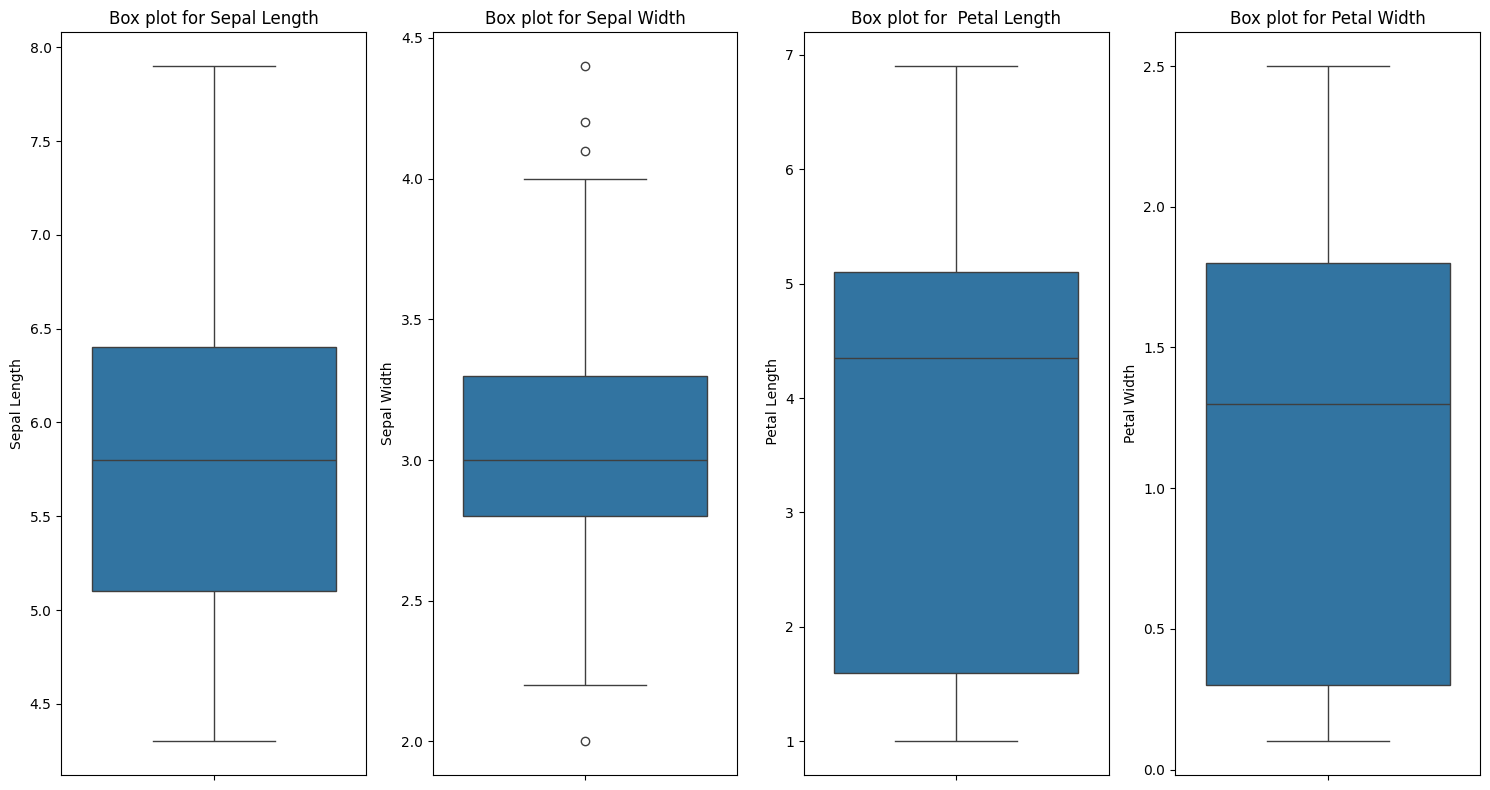

In [3]:
def plot_boxplots(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include='number').columns

    # Set up the matplotlib figure
    plt.figure(figsize=(15, 8))
    for i, column in enumerate(numeric_columns, start=1):
        plt.subplot(1, len(numeric_columns), i)
        sns.boxplot(y=df[column])
        plt.title(f'Box plot for {column}')

    plt.tight_layout()
    plt.show()
plot_boxplots(data)

In [4]:
def extract_outliers(df,column,threshold=1.5):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-threshold*iqr
    upper_bound=q3+threshold*iqr
    outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return outliers
outliers_iqr=extract_outliers(data,'Sepal Width')
print(outliers_iqr)
data_cleaned = data[~data['Sepal Width'].isin(outliers_iqr['Sepal Width'])]

    Sepal Length  Sepal Width   Petal Length  Petal Width            Class
15           5.7          4.4            1.5          0.4      Iris-setosa
32           5.2          4.1            1.5          0.1      Iris-setosa
33           5.5          4.2            1.4          0.2      Iris-setosa
60           5.0          2.0            3.5          1.0  Iris-versicolor


In [5]:
x=data_cleaned.drop('Class',axis=1)
y=data_cleaned[['Class']]
y

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6)

In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust the parameters accordingly
labels = dbscan.fit_predict(x)

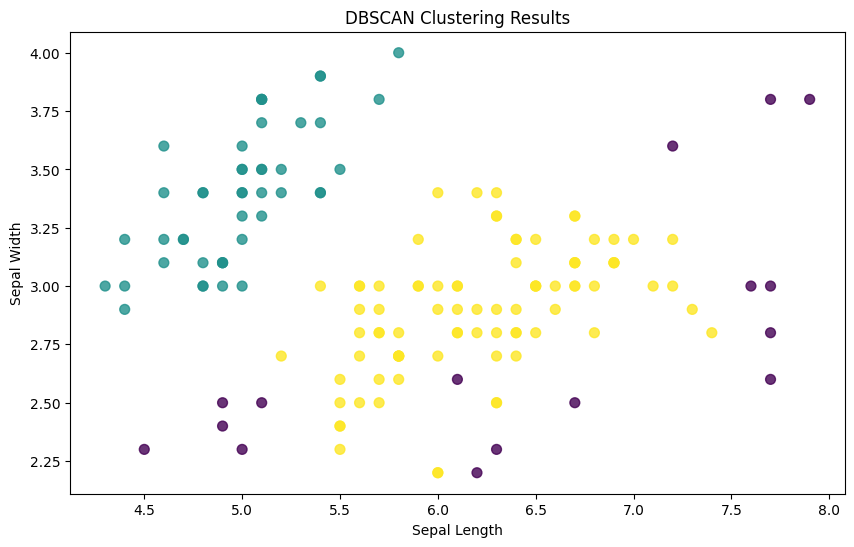

In [8]:
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=labels, cmap='viridis', s=50, alpha=0.8)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()